In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from astroML.correlation import bootstrap_two_point_angular

In [15]:
def load_data(filename):
    data = pd.read_csv(filename, sep='\s+')
    data = data[(data['r-mag'] >= 17) & (data['r-mag'] <= 20)]
    return data

In [16]:
def compute_results(data, bins, method='landy-szalay', n_bootstraps=10, random_state=0):
    np.random.seed(random_state)
    results = [bins]
    results += bootstrap_two_point_angular(data['#RA'], data['DEC'], bins=bins, method=method, Nbootstraps=n_bootstraps)
    return results

In [17]:
def plot_correlation(bin_centers, corr, corr_err):
    plt.errorbar(bin_centers, corr, corr_err, fmt='.k', ecolor='gray', lw=1)
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\hat{w}(\theta)$')
    plt.xscale('log')

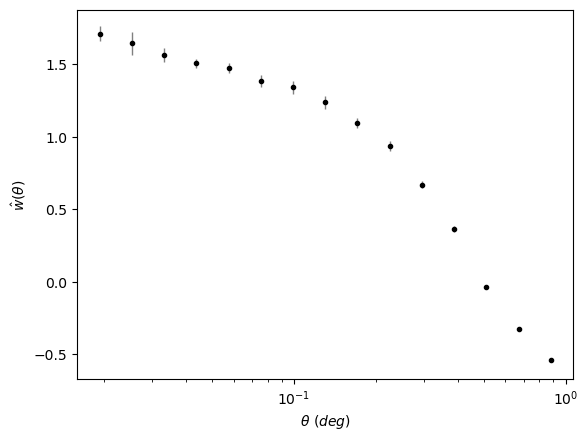

In [18]:
 if __name__ == '__main__':
    filename = 'BCS05hr_reduced.txt'
    bins = np.logspace(-np.log10(60), 0, 16)
    data = load_data(filename)
    results = compute_results(data, bins)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plot_correlation(bin_centers, results[1], results[2])
    plt.show()